# Preface
We will be diving straight into manipulating a dataset that I grabbed from [Kaggle](https://www.kaggle.com/datasets). It is a [spinal dataset](https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset) that contains samples of many peoples spinal features and whether their specific spine is abnormal or not. The goal here is to experiment with preprocessing and unsupervised models to improve the testing accuracy of the data on a few supervised models.

### Tools Used
* [python3](https://www.python.org/download/releases/3.0/)
* [numpy](http://www.numpy.org/)
* [pandas](https://pandas.pydata.org/)
* [sklearn](http://scikit-learn.org/stable/)

# Let's Begin

### Imports

In [1]:
import pandas as pd
import numpy as np

### Load the Data
We will be using a [spine dataset](https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset) from Kaggle.

In [2]:
# import the dataset
dataset = pd.read_csv('Dataset_spine.csv')

print(dataset.shape)
X = dataset.iloc[ : , :12].values # (inputs) features columns
Y = dataset.iloc[ : , 12].values # (outputs) abnormal/normal class column

print(X.shape)
print(Y.shape)

(310, 14)
(310, 12)
(310,)


### Split the Data
Splitting the data into training and testing sets.

In [3]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y) # splits 25% test by default

### Encode the Labels
We will go ahead and encode the class labels to a 1 and 0 so that it will be simpler to deal with and makes it convenient for visualizations.

In [4]:
# Label Encoding of classes for convenience
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print("Before encoding:{}".format(Y_train))# Before encoding

Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

print("After encoding:{}".format(Y_train)) # After encoding

Before encoding:['Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Normal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Abnormal'
 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Normal'
 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Normal' 'Normal' 'Abno

### Visualize the Data
We will use pandas built-in scatter matrix plotting to get a view of the relationships between the features and how well seperated the classes are.

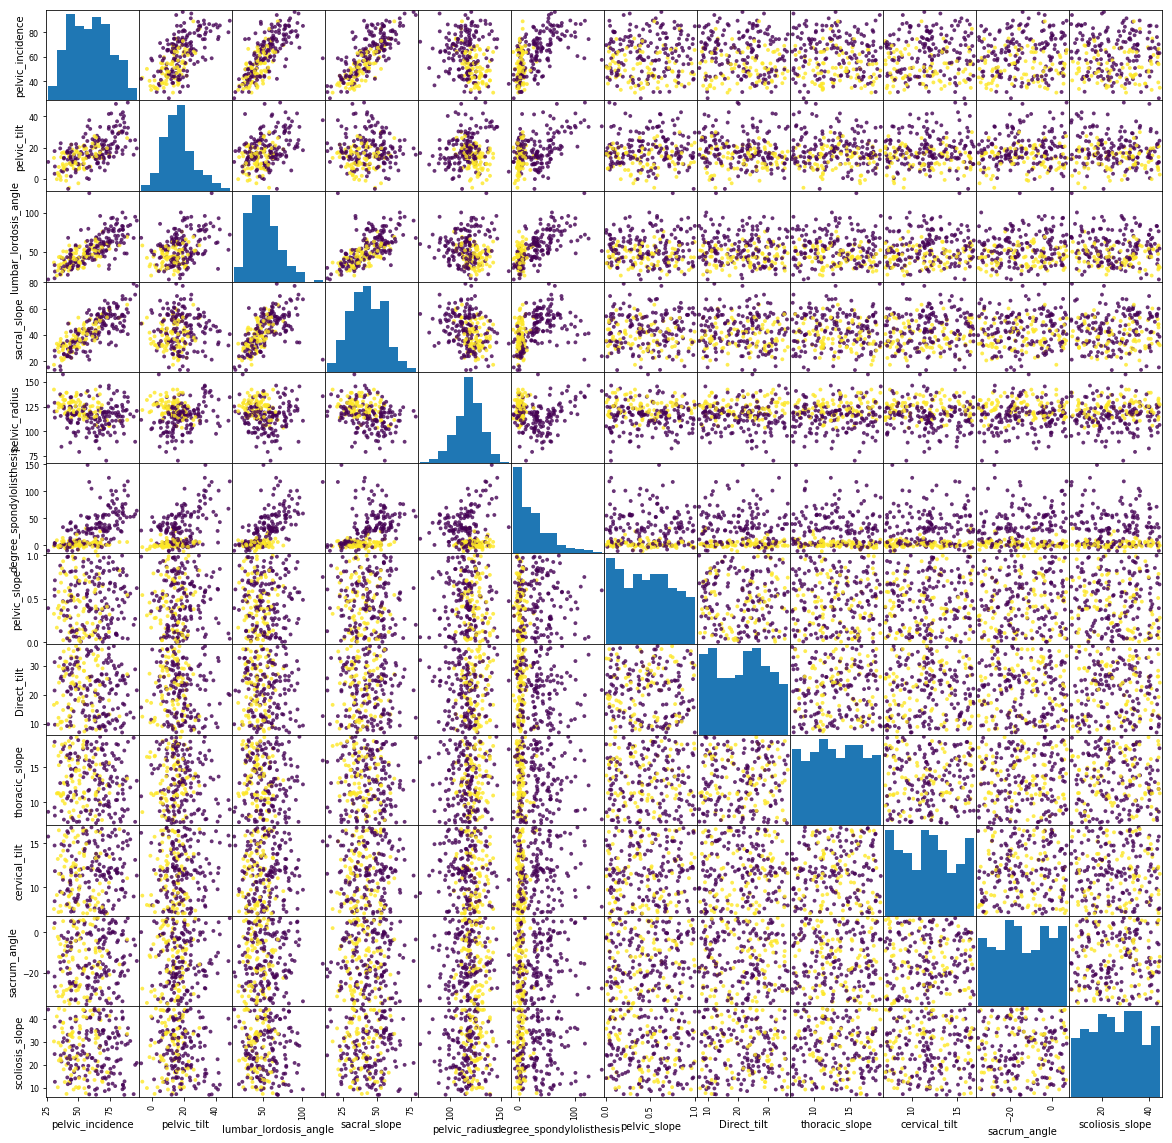

In [6]:
# Visualize the data

# change to dataframes first
spine_dataframe = pd.DataFrame(X_train, columns = ['pelvic_incidence','pelvic_tilt',
                                                   'lumbar_lordosis_angle','sacral_slope',
                                                   'pelvic_radius','degree_spondylolisthesis',
                                                   'pelvic_slope','Direct_tilt','thoracic_slope',
                                                   'cervical_tilt','sacrum_angle','scoliosis_slope'])

pd.plotting.scatter_matrix(spine_dataframe, figsize = (20,20), c= Y_train, s = 60, alpha=.8);

This data looks like many of the feature are meaningless, so we'll definitely need to do some feature selection or dimensionality reduction.

### Dimensionality Reduction with PCA
Let's try using [PCA(principal components analysis)](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) as the decomposition algorithm that will reduce the dimensionality by finding "principal components" that are just a weighted sum of data points in a certain "direction" in the data. The highest valued principal component is the 1st, and they cascade down from there. They always exist, you just choose how many of the top ones you wish to use.

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # lets use the first 2  principal components

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

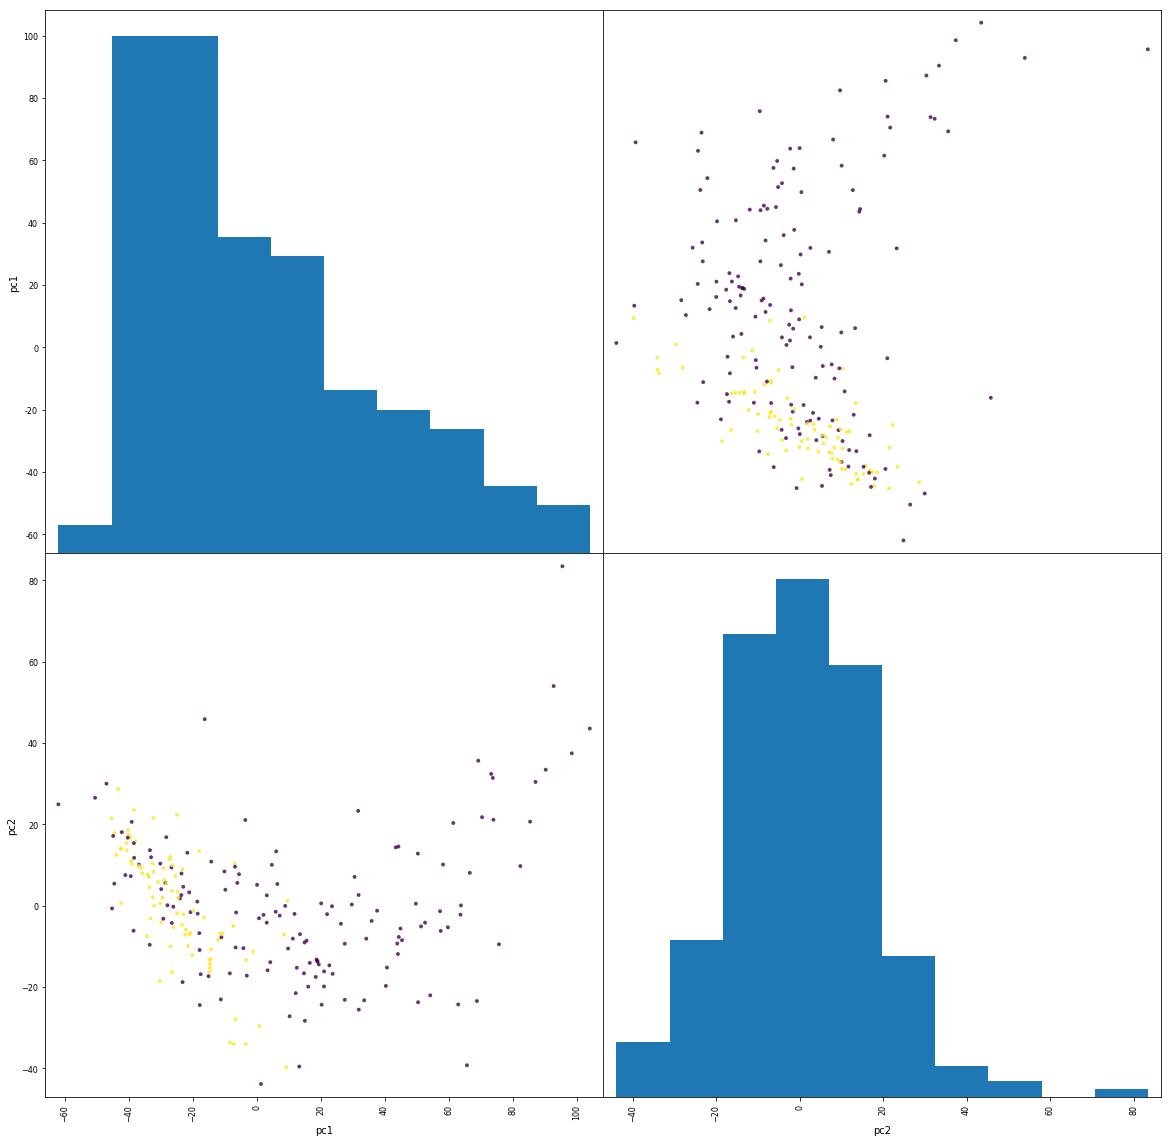

In [8]:
# Visualize the data

# change to dataframes first
spine_dataframe_pca = pd.DataFrame(X_train_pca, columns = ['pc1','pc2'])

pd.plotting.scatter_matrix(spine_dataframe_pca, figsize = (20,20), c= Y_train, s = 60, alpha=.8);

Still not very well seperate.. maybe this data is just too sparse, let's find an equivalent to PCA that is better with sparse data.

### Dimensionality Reduction with TruncatedSVD
[TruncatedSVD](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD) is recommended as a PCA alternative for sparse data. It is said to work similarly except that it does not center the data before doing the decomposition. Let's give it a go.

In [9]:
from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=2)

X_train_tsvd = tsvd.fit_transform(X_train)
X_test_tsvd = tsvd.transform(X_test)

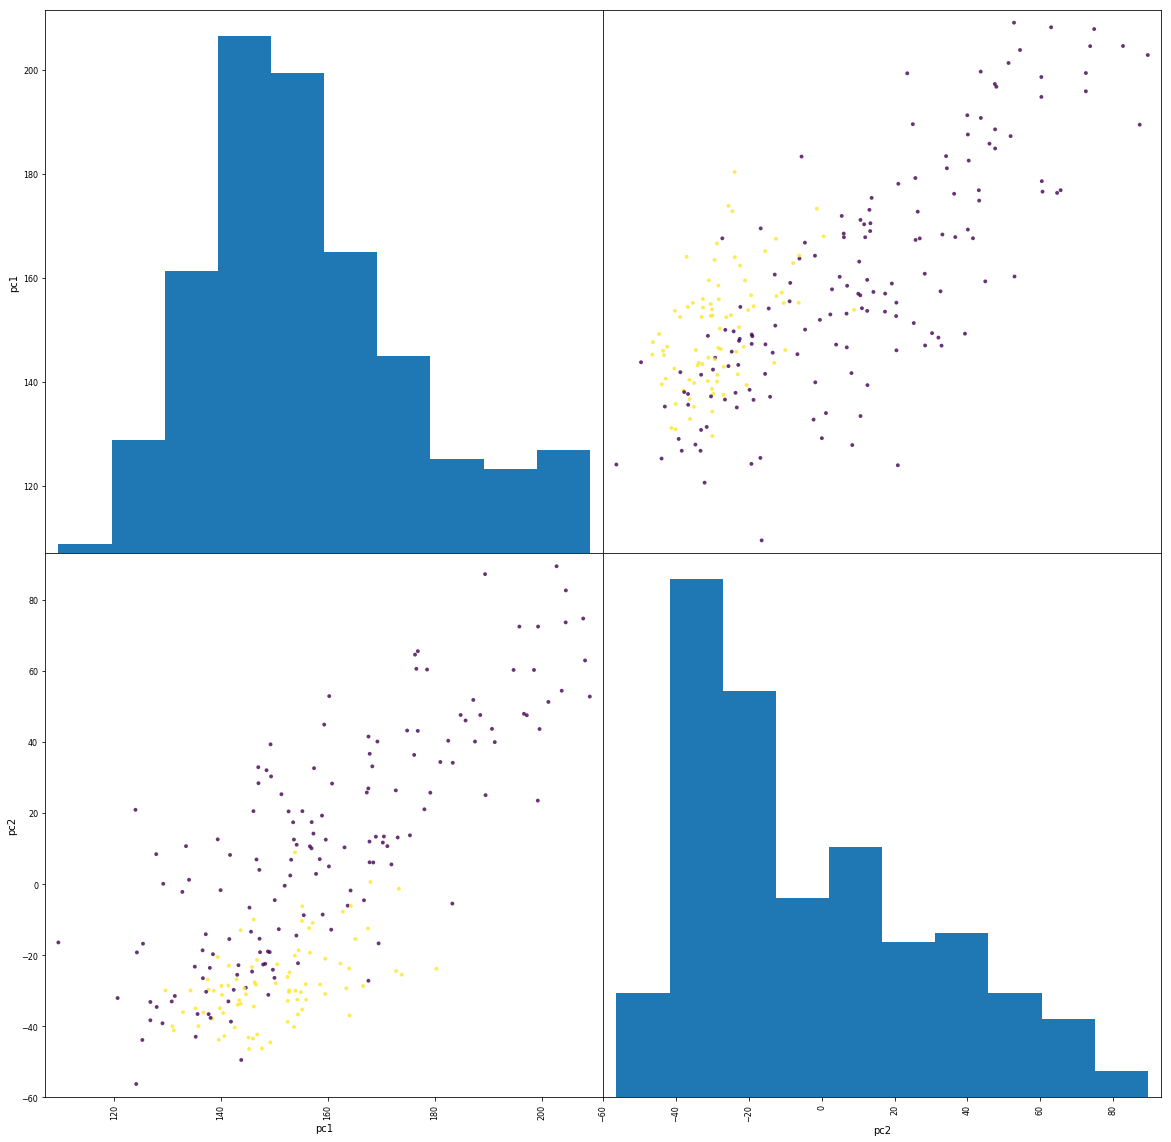

In [10]:
# Visualize the data

# change to dataframes first
spine_dataframe_tsvd = pd.DataFrame(X_train_tsvd, columns = ['pc1','pc2'])

pd.plotting.scatter_matrix(spine_dataframe_tsvd, figsize = (20,20), c= Y_train, s = 60, alpha=.8);

This is looking a little better, with the classes not being completely homogenized.

### Run through Supervised Models
Let's run the data through a series of supervised models to see what might work best.

#### KNN
Let's start with [KNN](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) as a baseline

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)

# Raw data
knn.fit(X_train,Y_train)
print("Test results of KNN on Raw data: {:.3f}".format(knn.score(X_test,Y_test)))

# PCA data
knn.fit(X_train_pca,Y_train)
print("Test results of KNN on PCA data: {:.3f}".format(knn.score(X_test_pca,Y_test)))

# TSVD data
knn.fit(X_train_tsvd,Y_train)
print("Test results of KNN on TSVD data: {:.3f}".format(knn.score(X_test_tsvd,Y_test)))

Test results of KNN on Raw data: 0.936
Test results of KNN on PCA data: 0.756
Test results of KNN on TSVD data: 0.833


Wow, it actually got worse at predicting when we tried to lower the dimensionality.
Maybe clustering would have been a better unsupervised setup for KNN.
Let's try using a linear model to see if it utilizes the decompositions better.

#### Linear SVM
Lets try [LinearSVM](http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html). Linear SVM works by utilizing support vectors, which are the datapoints that lie on the border between the classes to best fit a decision boundary.

In [12]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(C=.01)

# We'll test all the data as we did with KNN
# Raw data
lsvc.fit(X_train,Y_train)
print("Test results of LSVC on Raw data: {:.3f}".format(lsvc.score(X_test,Y_test)))

# PCA data
lsvc.fit(X_train_pca,Y_train)
print("Test results of LSVC on PCA data: {:.3f}".format(lsvc.score(X_test_pca,Y_test)))

# TSVD data
lsvc.fit(X_train_tsvd,Y_train)
print("Test results of LSVC on TSVD data: {:.3f}".format(lsvc.score(X_test_tsvd,Y_test)))

Test results of LSVC on Raw data: 0.859
Test results of LSVC on PCA data: 0.769
Test results of LSVC on TSVD data: 0.756


The LSCV scores are pretty equivalent to the KNN scores after tuning the regularization factor.
So we would have been better off just having left the data untouched.

#### Random Forests
So as a final hurrah, lets just test them all on [Random Forests](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) algorithm, which I presume won't work well since this is such a sparse dataset. (low amount of samples)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Raw data
rfc.fit(X_train,Y_train)
print("Test results of RFC on Raw data: {:.3f}".format(rfc.score(X_test,Y_test)))

# PCA data
rfc.fit(X_train_pca,Y_train)
print("Test results of RFC on PCA data: {:.3f}".format(rfc.score(X_test_pca,Y_test)))

# TSVD data
rfc.fit(X_train_tsvd,Y_train)
print("Test results of RFC on TSVD data: {:.3f}".format(rfc.score(X_test_tsvd,Y_test)))

Test results of RFC on Raw data: 0.910
Test results of RFC on PCA data: 0.756
Test results of RFC on TSVD data: 0.833


c:\users\dylan.campbell\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Just as a curiousity, let's try to improve these scores further by using clustering.

### Clustering with K-Means
We'll use [K-means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering. Its a common and simple clustering algorithm that works by swapping between two steps.

* First off it selects an N amount of data points that are farthest from one another and assigns them as "cluster centers". 
* After that it starts the 2 steps swapping.
    1. Assign each data point to closest cluster center
    2. Set each cluster center to the mean of the data points that are assigned to it.
* Ends when both of these steps have gained equilibrium.

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7)

X_train_km = km.fit_transform(X_train)
X_test_km = km.transform(X_test)

print(X_train_km.shape)

(232, 7)


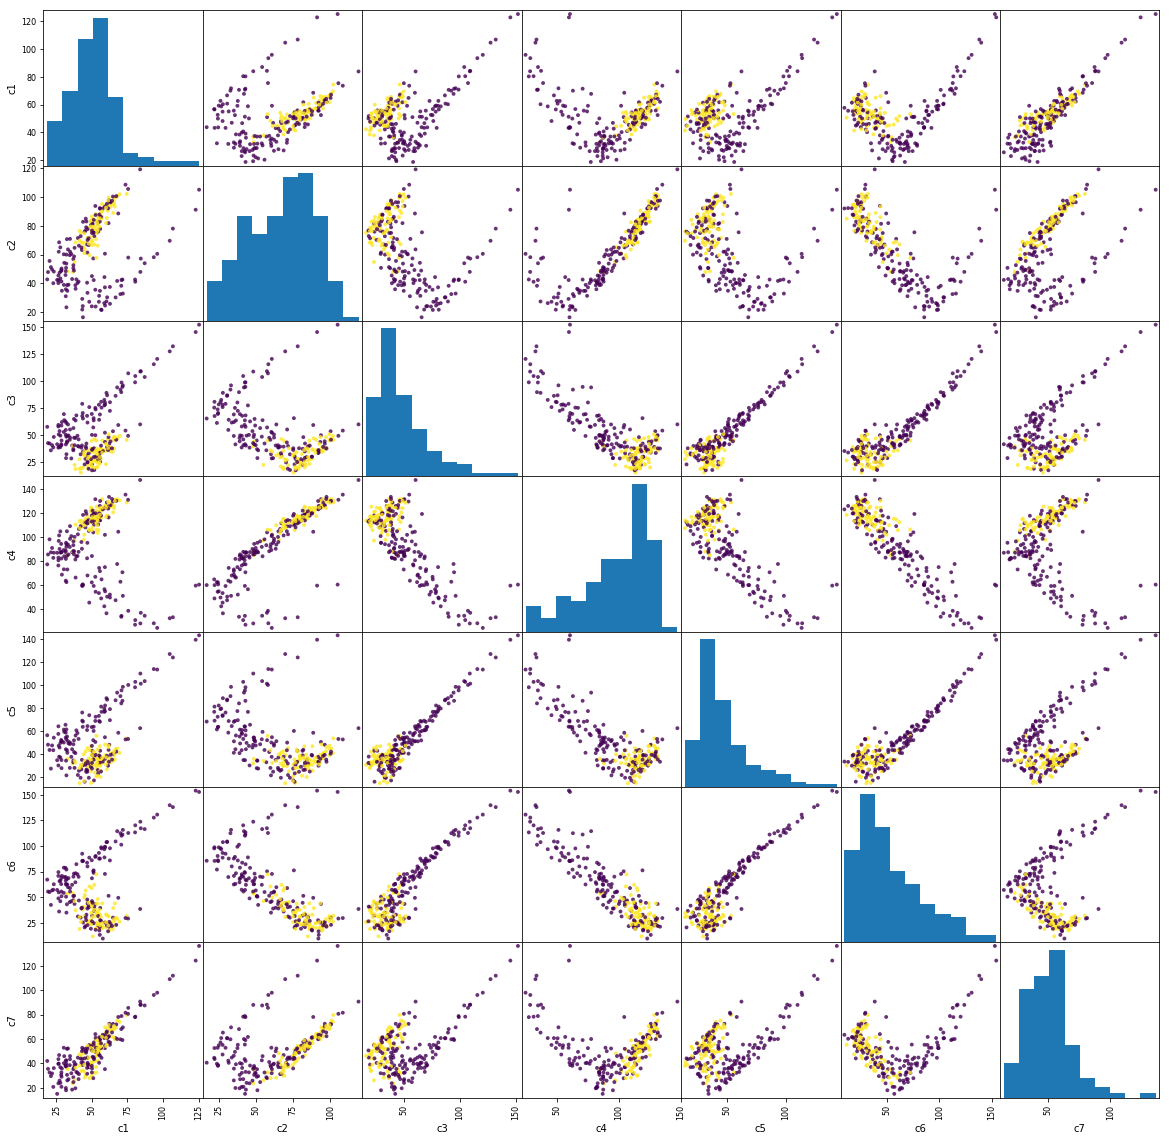

In [15]:
# Visualize the data

# change to dataframes first
spine_dataframe_km = pd.DataFrame(X_train_km, columns = ['c1','c2','c3','c4','c5','c6','c7'])

pd.plotting.scatter_matrix(spine_dataframe_km, figsize = (20,20), c= Y_train, s = 60, alpha=.8);

### Test Supervised Models on Clustered Data

In [16]:
# KNN on KM data
knn.fit(X_train_km,Y_train)
print("Test results of KNN on KM data: {:.3f}".format(knn.score(X_test_km,Y_test)))

# LSVC on KM data
lsvc.fit(X_train_km,Y_train)
print("Test results of LSVC on KM data: {:.3f}".format(lsvc.score(X_test_km,Y_test)))

# RFC on KM data
rfc.fit(X_train_km,Y_train)
print("Test results of KNN on KM data: {:.3f}".format(rfc.score(X_test_km,Y_test)))

Test results of KNN on KM data: 0.821
Test results of LSVC on KM data: 0.872
Test results of KNN on KM data: 0.859


The data performed worse on KNN but better on the Linear SVClassifier.
Hmm... this surprised me. I would think that clustering data would help KNN more accurately grab the correct classifications.
It seems it actually worked against it by preclustering.

OH! This is probably due to the raw data not being a shape that KMeans can handle very well. Our lowered dimensionality data, TSVD for example, is a lot closer to a reasonably seperable shape. So let's push the TSVD data through K-Means and see if we can find increased performance.

### Test Supervised Models on Clustered and Dimensionality Reduced Data

In [67]:
km = KMeans(n_clusters=14)

X_train_km = km.fit_transform(X_train_tsvd)
X_test_km = km.transform(X_test_tsvd)

print(X_train_km.shape)

(232, 14)


In [68]:
# KNN on KM data
knn.fit(X_train_km,Y_train)
print("Test results of KNN on KM data: {:.3f}".format(knn.score(X_test_km,Y_test)))

# LSVC on KM data
lsvc.fit(X_train_km,Y_train)
print("Test results of LSVC on KM data: {:.3f}".format(lsvc.score(X_test_km,Y_test)))

# RFC on KM data
rfc.fit(X_train_km,Y_train)
print("Test results of RFC on KM data: {:.3f}".format(rfc.score(X_test_km,Y_test)))

Test results of KNN on KM data: 0.859
Test results of LSVC on KM data: 0.872
Test results of RFC on KM data: 0.808


Stronger score on KNN! Less than or equal on the other 2 models. Still none of these are doing better than the raw data with the KNN classifier.

### Conclusion
I learned a good bit working on this spinal data set. I found that many of my assumptions on preprocessing the data were off. It was nice to start experimenting with more unsupervised models and seeing how they chain with the supervised models. I will definitely get into more of this.

I threw in the Random Forests ensemble because I've heard great things about Random Forests and Gradient Boosted Decision Trees, so I hope to delve deeper into those in a blog soon.